<div style="padding: 15px; border: 5px solid transparent; border-color: transparent; margin-bottom: 20px; border-radius:4px; color: #3c763d; background-color: #dff0d8; border-color: #d6e9c6; font-weight: bold;">
    <br><br>
    <div style="font-weight: bold; font-size: 40px">인공지능 윤리</div>
    <div style="font-weight: bold; font-size: 20px">[06] 인공지능과 데이터 편향성</div>
    <hr style="width:80%;text-align:left;margin-left:0;border:0.5px solid green">
    <활동 목표>
        <br>데이터 편향성에 대한 이해를 바탕으로, 데이터 편향성 문제를 개선한 인공지능을 개발할 수 있다.<br><br>
        [활동 1] 성별 예측 인공지능 개발하기<br>
        [활동 2] 데이터 편향성 문제 개선을 위한 우리의 노력<br>
</div>

<div style="padding: 15px; border: 5px solid transparent; border-color: transparent; margin-bottom: 20px; border-radius: 4px; color: #3c763d; border-color: #d6e9c6; font-weight: bold;"><h2 style='font-weight: bold'>0. 인공지능의 데이터 편향성 문제 이해하기</h2></div>

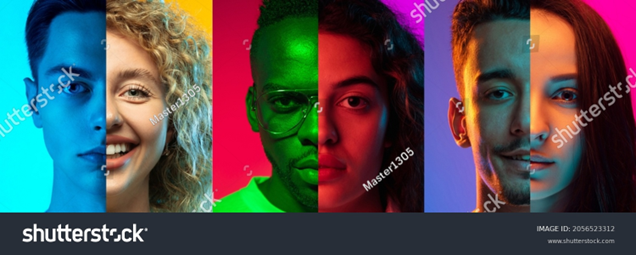

이전 차시에서는 인공지능에서 나타나는 다양한 데이터 편향성 사례들을 살펴보았습니다. 

얼굴 특징을 통해 성별을 예측하는 인공지능을 만들어봅시다. 데이터 편향성으로 인한 문제가 있는지 확인해보고, 문제가 있다면 개선해봅시다.


## **<STEP 1> 데이터 분석하기**



## 1. 필요한 모듈 불러오기
프로그래밍에 필요한 라이브러리를 불러옵니다.


In [1]:
import pandas as pd # 데이터 처리를 위한 라이브러리 불러오기
import numpy as np # 수치계산을 위한 라이브러리 불러오기
import matplotlib.pyplot as plt # 차트 표현을 위한 matplotlib 불러오기
import seaborn as sns # 시각화를 위한 seaborn 모듈 불러오기
%matplotlib inline


## 2. 데이터 불러오기
사용할 데이터셋을 읽어옵니다.


In [2]:
# 데이터 읽기

df=pd.read_csv(____________________)


## 3. 데이터셋 내용 확인하기

In [3]:
# 데이터셋 보여주기

____________

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,11.8,6.3,1,1,1,1,1
2,0,14.4,6.1,0,1,1,1,1
3,1,13.0,6.8,1,1,1,1,1
4,1,15.3,6.2,1,1,1,0,1
...,...,...,...,...,...,...,...,...
2746,1,12.1,6.2,1,1,1,1,1
2747,1,14.1,7.0,1,1,1,1,1
2748,1,12.9,7.0,1,1,1,1,1
2749,1,12.3,6.9,0,1,1,1,1


In [4]:
# 열 이름 확인하기

df.______________

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

데이터셋의 정보를 확인합니다.


- Non-Null Count를 통해 결측치의 유무를 확인할 수 있습니다. 여기서는 NULL인 값이 없으므로 결측치 처리를 하지 않아도 됩니다.
- 
Dtype을 통해 데이터 타입을 확인할 수 있습니다



In [5]:
# 데이터셋 요약 설명

df._______________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2751 entries, 0 to 2750
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  2751 non-null   int64  
 1   forehead_width_cm          2751 non-null   float64
 2   forehead_height_cm         2751 non-null   float64
 3   nose_wide                  2751 non-null   int64  
 4   nose_long                  2751 non-null   int64  
 5   lips_thin                  2751 non-null   int64  
 6   distance_nose_to_lip_long  2751 non-null   int64  
 7   gender                     2751 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 172.1 KB


수치형 데이터로 이루어진 열들의 통계를 확인합니다.
- count: 컬럼별 총 데이터수
- mean / std: 컬럼별 데이터의 평균 / 표준편차
- min / max: 컬럼별 데이터의 최솟값 / 최댓값
- 25% / 50% / 75% : 백분위의 각 지점의 값

In [6]:
# 데이터셋의 숫자 데이터 통계 확인하기

df._______________

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
count,2751.000000,2751.000000,2751.000000,2751.000000,2751.000000,2751.000000,2751.000000,2751.000000
mean,0.864776,13.491276,6.071320,0.805162,0.812432,0.797892,0.808433,0.908760
std,0.342024,1.177571,0.588541,0.396148,0.390438,0.401646,0.393605,0.288002
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.500000,5.600000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,13.500000,6.100000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,14.500000,6.550000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# 각 클래스에 속한 데이터 수. 1: 남성, 0: 여성

df[______________].value_counts()

gender
1    2500
0     251
Name: count, dtype: int64


## **<STEP 2> 데이터 시각화하기**


## 1. 막대그래프로 나타내기
성별에 따른 데이터 수를 막대 그래프로 시각화합니다. 데이터 편향성이 나타나는지 확인해봅니다.


<AxesSubplot:xlabel='gender', ylabel='count'>

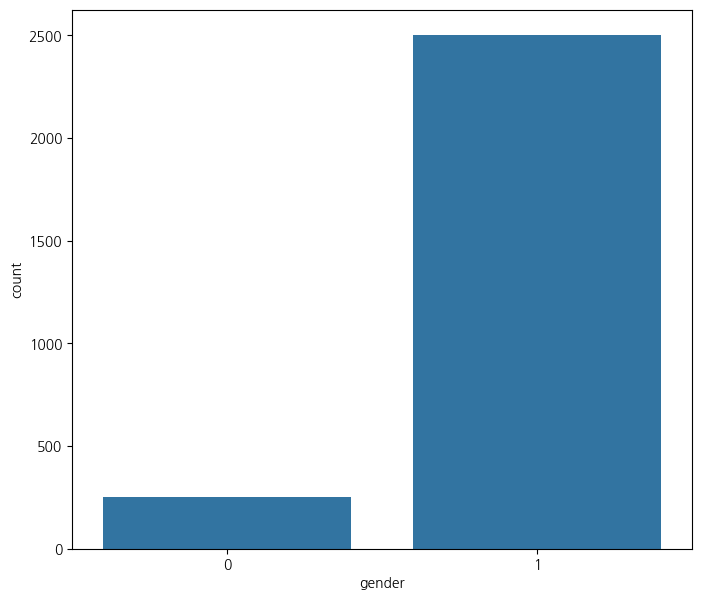

In [8]:
# 막대그래프로 나타내기

plt.figure(figsize=(8,7))
sns._________________(x=___________, data=df)


## 2. 히트맵으로 나타내기
히트맵으로 표현했을 때, 상관계수의 절댓값이 1에 가까울수록 상관관계가 높습니다.

<AxesSubplot:>

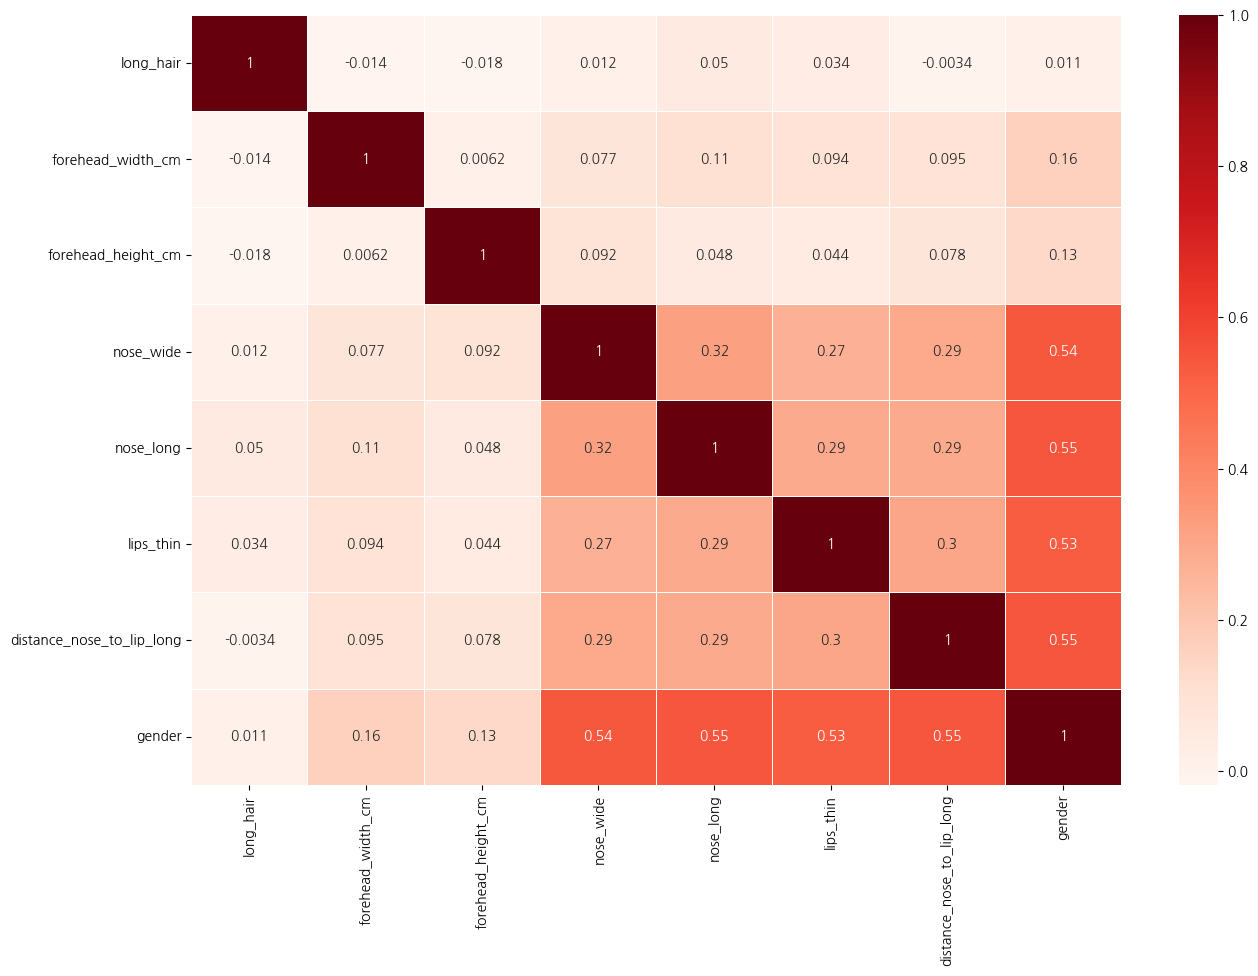

In [9]:
# heatmap(히트맵)으로 나타내기

plt.figure(figsize=(15,10))
sns.________________(df.corr(), annot=True, linewidths=0.5, cmap="Reds")


## 3. 산점도로 나타내기
 


In [10]:
m_col=['long_hair','forehead_width_cm','forehead_height_cm','nose_wide',
       'nose_long','lips_thin','distance_nose_to_lip_long','gender']

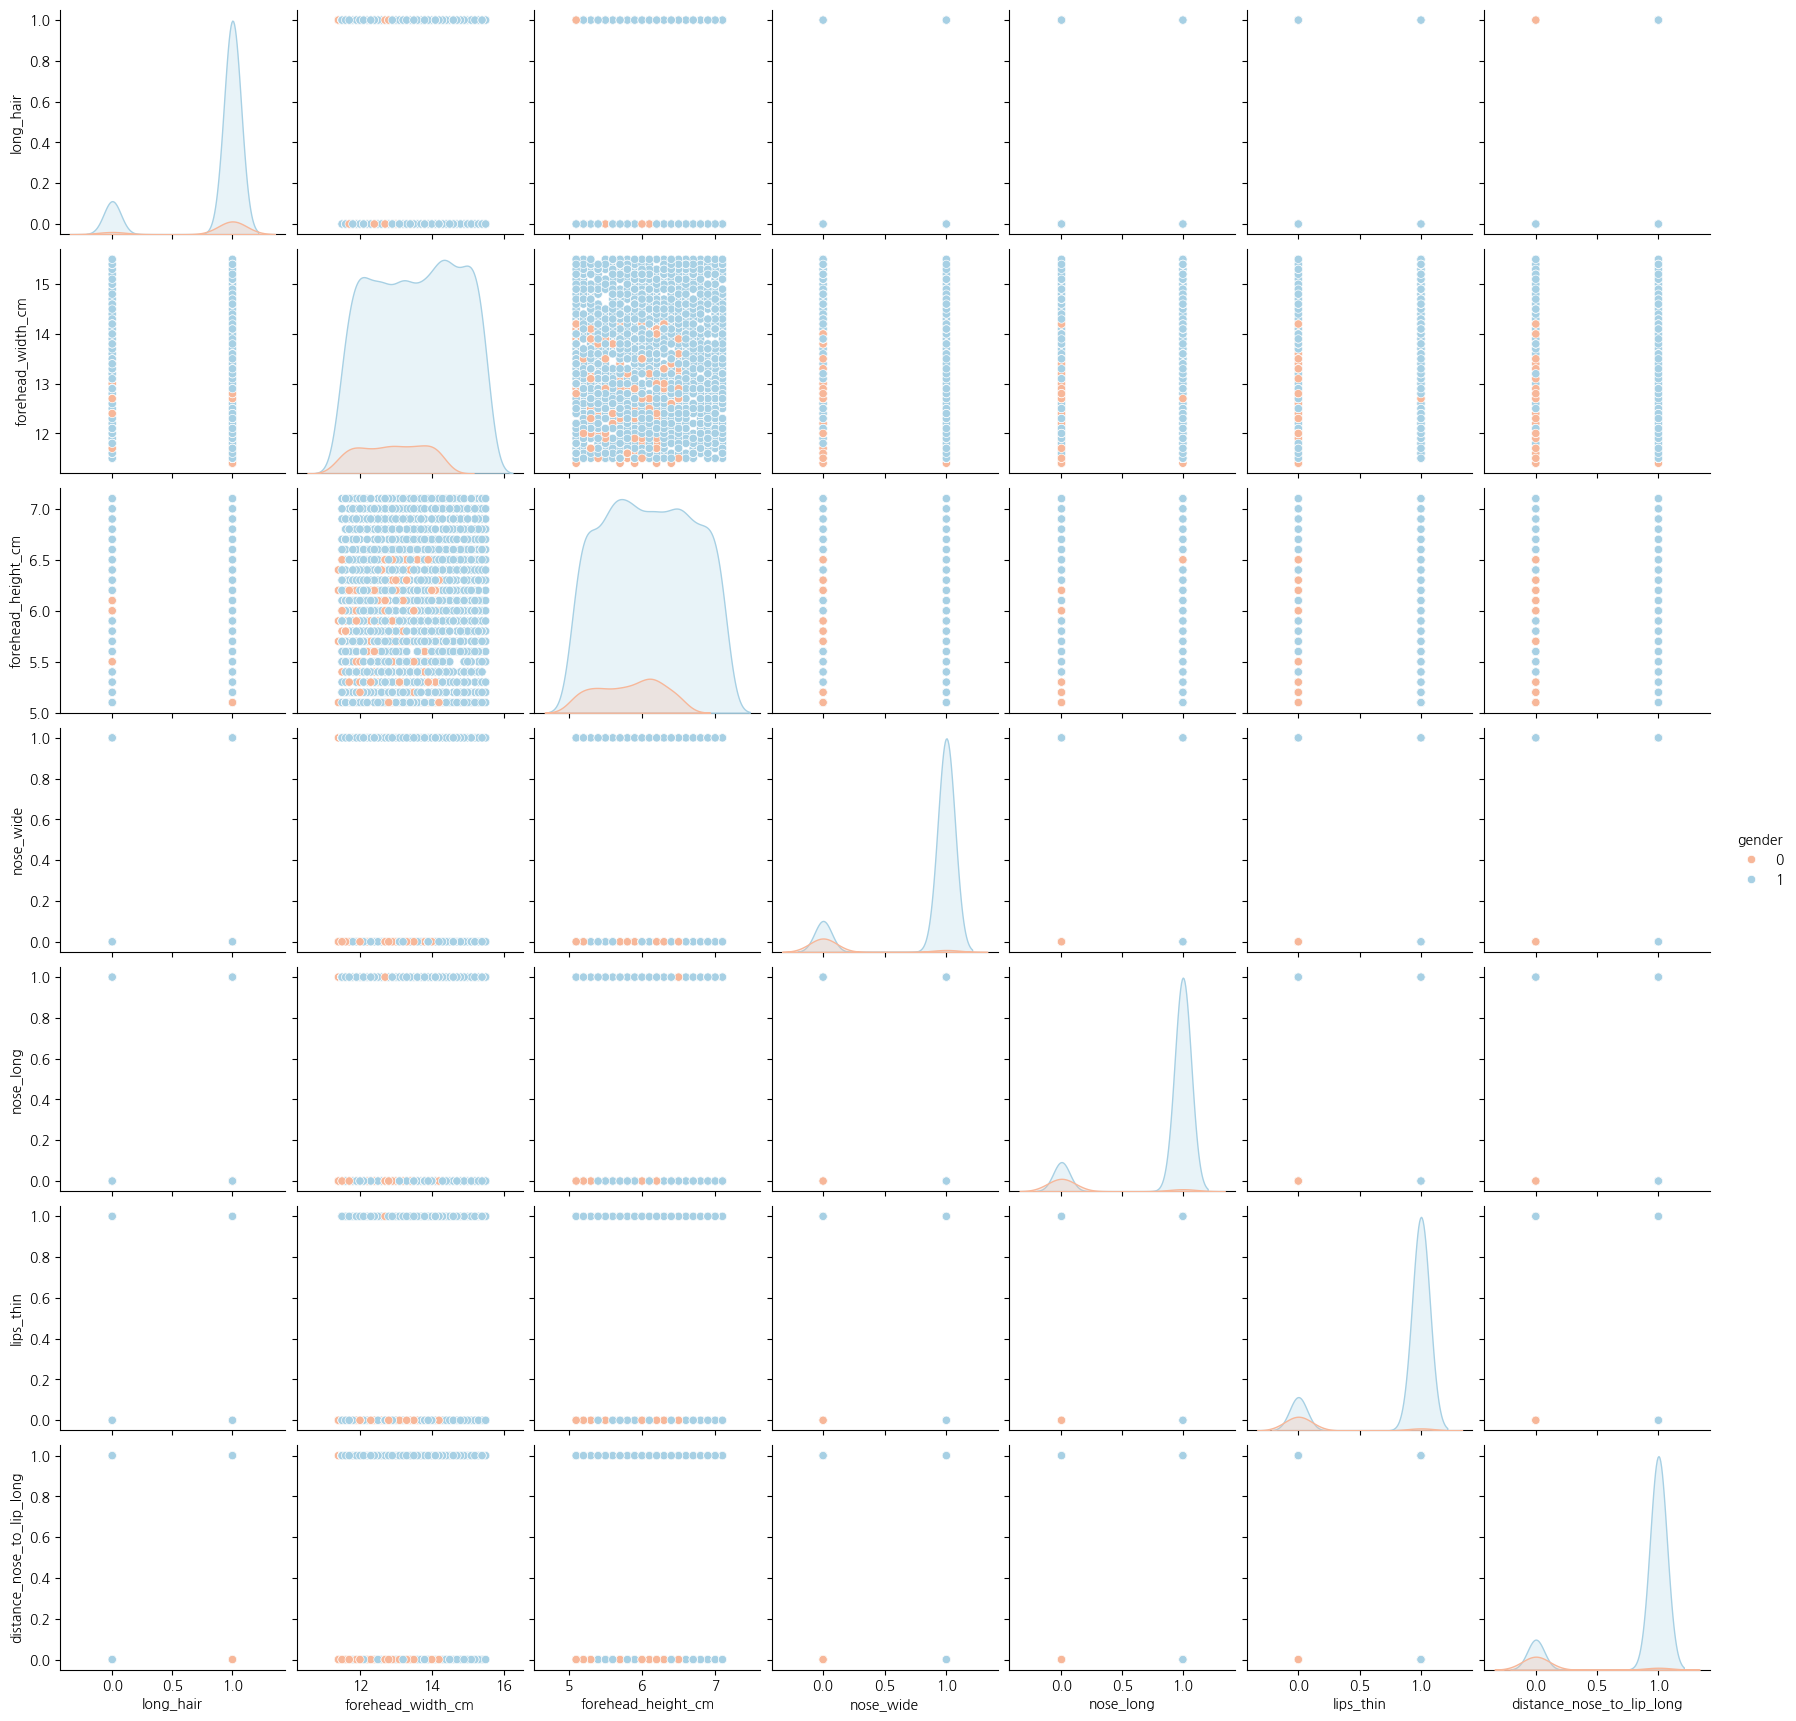

In [11]:
# Pairplot(변수 간 산점도)으로 나타내기
sns._______________(df[m_col], hue=______________, palette='RdBu')


## **<STEP 3> 인공지능 모델 학습시키기**



## 1. 데이터셋을 독립변수와 종속변수로 나누기


In [12]:
# X에는 예측해야 할 종속변수(성별)를 제외한 나머지 데이터 저장

X=df.drop('gender',axis=1)

# Y에 예측해야 할 종속변수(성별) 저장

Y=df['gender']

In [13]:
# X 보여주기

X

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,11.8,6.3,1,1,1,1
2,0,14.4,6.1,0,1,1,1
3,1,13.0,6.8,1,1,1,1
4,1,15.3,6.2,1,1,1,0
...,...,...,...,...,...,...,...
2746,1,12.1,6.2,1,1,1,1
2747,1,14.1,7.0,1,1,1,1
2748,1,12.9,7.0,1,1,1,1
2749,1,12.3,6.9,0,1,1,1


In [14]:
# Y 보여주기

Y

0       1
1       1
2       1
3       1
4       1
       ..
2746    1
2747    1
2748    1
2749    1
2750    1
Name: gender, Length: 2751, dtype: int64


## 2. 데이터 셋을 훈련 데이터와 테스트 데이터로 분할하기


In [23]:
from sklearn.model_selection import train_test_split # 훈련 데이터와 테스트 데이터로 분할하는 모듈 추가
X_train,X_test,Y_train,Y_test= _________________(X,Y,___________________,random_state=1) # 훈련 데이터 70%, 테스트 데이터 30%로 분할


## 3. 랜덤 포레스트 분류 모델 활용하여 학습시키기


In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.____________(X_train,Y_train)

RandomForestClassifier()


## 4. 테스트 데이터로 성별 예측하기


In [25]:
prediction=rfc.____________(X_test)


## **<STEP 4> 모델 성능 평가하기**



## 1. 모델 정확도 계산하기


In [26]:
# 모델 정확도 계산
from sklearn.metrics import accuracy_score
rfc_acc = accuracy_score(Y_test, prediction)

print("정확도:",rfc_acc)

정확도: 0.9818401937046005



## 2. 모델 성능 평가하기
오차 행렬과 평가 지표를 통해 모델의 성능을 평가합니다.  


In [27]:
from sklearn.metrics import confusion_matrix,classification_report

print("오차행렬(Confusion matrix): \n",confusion_matrix(Y_test,prediction))
print("\n")
# precision(정밀도), recall(재현율), f1-score를 통한 성능 평가
print("Classification Report: \n",classification_report(Y_test,prediction))

오차행렬(Confusion matrix): 
 [[ 76   7]
 [  8 735]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91        83
           1       0.99      0.99      0.99       743

    accuracy                           0.98       826
   macro avg       0.95      0.95      0.95       826
weighted avg       0.98      0.98      0.98       826




## **<STEP 5> 데이터 편향성 문제 개선하기**
1. 완성한 프로그램을 저장한 후, "파일"-> "Notebook 복제하기"를 누릅니다.
2. 편향성이 없는 데이터("gender_classification2.csv")를 업로드하고 프로그램을 실행시킵니다.
3. "gender_classification2.csv" 파일로 학습 시, 데이터 편향성이 나타나는지 확인해봅니다.
4. 프로그램을 실행시킨 후, 학습한 데이터에 따라 결과가 어떻게 다르게 나타나는지 비교해봅시다.
- 학습한 데이터에 따라 변수 간 상관관계가 어떻게 다르게 나타났나요?
- 모델의 성능은 어떤 경우 더 좋게 나타났나요? 이를 통해 어떤 문제점이 발생할 것이라고 유추해볼 수 있나요?